In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import contextily as ctx
import folium
from folium.features import DivIcon
from IPython.display import display
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import r2_score
import tensorflow as tf
import random



In [2]:
# Read the Dataset and get the first 5 rows
df = pd.read_csv('c:/Users/pd63899/Downloads/TRN_RD_TRAFFICCOUNT_TVW_PV_6982498275562085494.csv')
df.head()

,MI_PRINX,SL Number,Site ID,Street Location,Between Street 1,Between Street 2,Direction Bound,Start Date,End Date,Count Year,...,PM Peak 5 To 6,Percent Heavy Vehicles,Speed Limit,Percentile 85th,Percent Exceed Speed Limit,Data Collected By,Longitude,Latitude,x,y
0,192,18,HAM_HRD_KRL_90,Hampden Road,Hardy Rd,Karella St,Northbound,3/9/2022 12:00:00 AM,3/16/2022 12:00:00 AM,2022,...,245,12.2,50,40.32,1.038,COP,115.813439,-31.972883,1.289229e+07,-3.759750e+06
1,193,19,HAM_HRD_KRL_91,Hampden Road,Hardy Rd,Karella St,Southbound,3/9/2022 12:00:00 AM,3/16/2022 12:00:00 AM,2022,...,252,14.4,50,37.98,0.461,COP,115.813439,-31.972883,1.289229e+07,-3.759750e+06
2,194,82,HAMPDN_HARDY_KARELA,Hampden Road,Hardy Rd,Karella St,Northbound,3/9/2022 12:00:00 AM,3/16/2022 12:00:00 AM,2022,...,245,12.2,50,40.32,1.038,COP,115.813439,-31.972883,1.289229e+07,-3.759750e+06
3,195,83,HAMPDN_HARDY_KARELA,Hampden Road,Hardy Rd,Karella St,Southbound,3/9/2022 12:00:00 AM,3/16/2022 12:00:00 AM,2022,...,252,14.4,50,37.98,0.461,COP,115.813439,-31.972883,1.289229e+07,-3.759750e+06
4,196,5,ALTRLN_HARDY_KARELA,Altair Lane,Hardy Road,Karella Street,Southbound/Northbound,2/20/2023 12:00:00 AM,2/27/2023 12:00:00 AM,2023,...,9,0.0,50,23.04,0.000,COP,115.813988,-31.972273,1.289236e+07,-3.759670e+06


In [3]:
# Get the statistical information
df.describe()

,MI_PRINX,SL Number,Count Year,Ave Weekday Traffic,ADT,AM Peak 8 To 9,PM Peak 5 To 6,Percent Heavy Vehicles,Speed Limit,Percentile 85th,Percent Exceed Speed Limit,Longitude,Latitude,x,y
count,191.0000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,1.910000e+02,1.910000e+02
mean,287.0000,48.471204,2022.534031,4079.240838,3781.518325,347.544503,372.439791,2.702010,48.848168,45.286848,11.836511,115.850124,-31.959019,1.289638e+07,-3.757919e+06
std,55.2811,28.020067,0.500152,3017.006115,2841.902917,268.931212,306.427007,4.274889,7.450396,10.780276,17.626956,0.020658,0.011344,2.296601e+03,1.494534e+03
min,192.0000,1.000000,2022.000000,17.000000,16.000000,2.000000,2.000000,0.000000,40.000000,18.180000,0.000000,115.813439,-31.988088,1.289229e+07,-3.761745e+06
25%,239.5000,24.500000,2022.000000,2200.500000,1972.500000,169.500000,182.000000,0.123400,40.000000,39.780000,0.185750,115.838285,-31.963013,1.289506e+07,-3.758455e+06
50%,287.0000,48.000000,2023.000000,3505.000000,3242.000000,305.000000,325.000000,0.500000,50.000000,45.180000,3.770000,115.857290,-31.955300,1.289718e+07,-3.757428e+06
75%,334.5000,72.000000,2023.000000,5404.000000,4789.000000,438.000000,461.000000,3.700000,50.000000,51.750000,16.720000,115.864729,-31.952027,1.289800e+07,-3.757001e+06
max,382.0000,102.000000,2023.000000,17246.000000,16037.000000,1730.000000,2667.000000,24.400000,70.000000,67.960000,87.330000,115.880141,-31.943766,1.289972e+07,-3.755930e+06


In [4]:
# Check null value
df.isnull().sum()

MI_PRINX                      0
SL Number                     0
Site ID                       0
Street Location               0
Between Street 1              0
Between Street 2              0
Direction Bound               0
Start Date                    0
End Date                      0
Count Year                    0
Ave Weekday Traffic           0
ADT                           0
AM Peak 8 To 9                0
PM Peak 5 To 6                0
Percent Heavy Vehicles        0
Speed Limit                   0
Percentile 85th               0
Percent Exceed Speed Limit    0
Data Collected By             0
Longitude                     0
Latitude                      0
x                             0
y                             0
dtype: int64

In [ ]:
# Convert date and time to pandas date/time format
df['Start Date']=pd.to_datetime(df['Start Date'])
df['End Date']=pd.to_datetime(df['End Date'])
df.head()

In [6]:
# Check column names
df.columns

Index(['MI_PRINX', 'SL Number', 'Site ID', 'Street Location',
       'Between Street 1', 'Between Street 2', 'Direction Bound', 'Start Date',
       'End Date', 'Count Year', 'Ave Weekday Traffic', 'ADT',
       'AM Peak 8 To 9', 'PM Peak 5 To 6', 'Percent Heavy Vehicles',
       'Speed Limit', 'Percentile 85th', 'Percent Exceed Speed Limit',
       'Data Collected By', 'Longitude', 'Latitude', 'x', 'y'],
      dtype='object')

# Visualize data

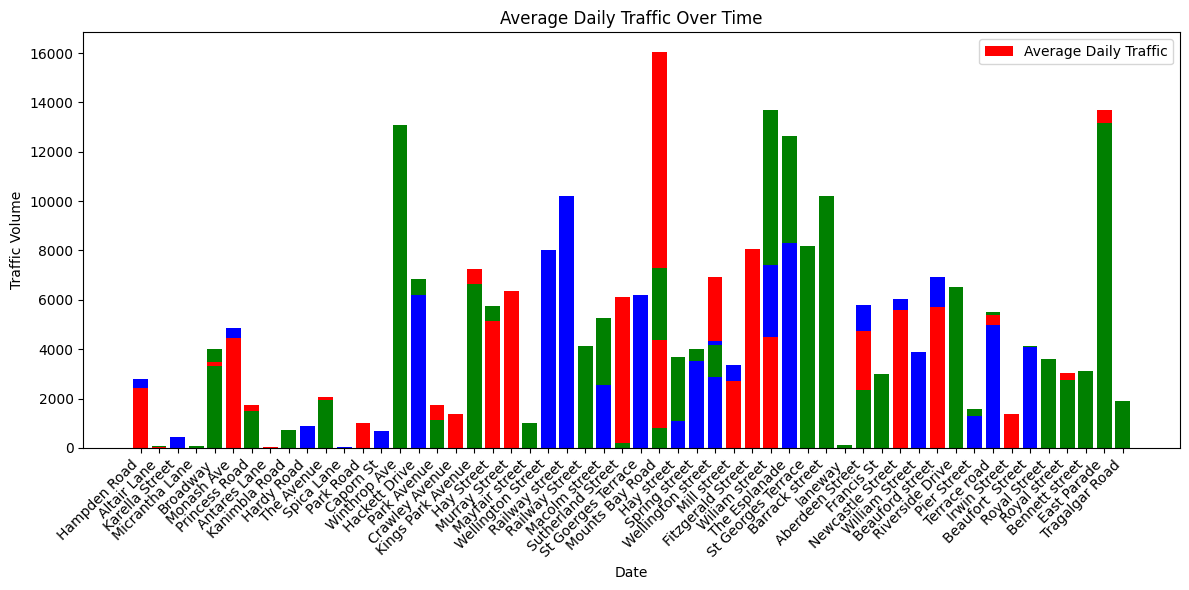

In [7]:
# Plot the the Average daily traffic(ADT) and their street locations
plt.figure(figsize=(12,6))
colors=['red', 'green', 'blue'] # List of colors for the bar 
plt.bar(df['Street Location'], df['ADT'], color=colors, label='Average Daily Traffic')
#plt.plot(df['Street Location'], df['ADT'], color=colors, label='Average Monthly Traffic')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Average Daily Traffic Over Time')
plt.legend()
# Make the x-axis label more visible
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels and align them to the right
plt.tight_layout() # Adjust layout to make room for the rotated labels
plt.show()

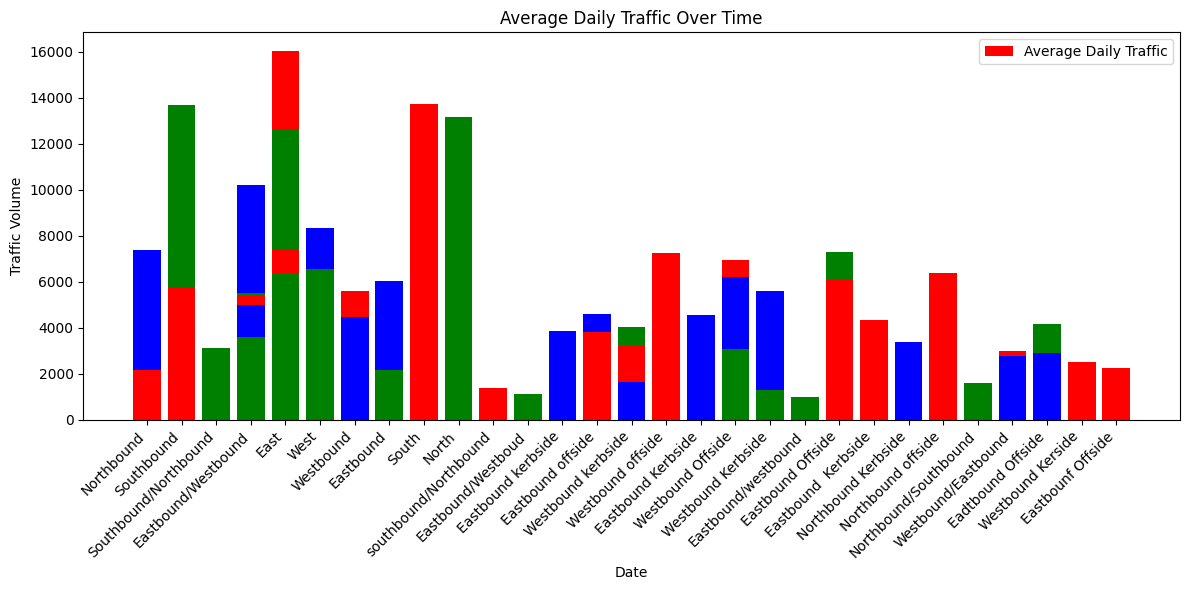

In [8]:
# Plot the the Average daily traffic(ADT) and their Direction bound

plt.figure(figsize=(12,6))
colors=['red', 'green', 'blue'] # List of colors for the bar 
plt.bar(df['Direction Bound'], df['ADT'], color=colors, label='Average Daily Traffic')
#plt.plot(df['Street Location'], df['ADT'], label='Average Monthly Traffic')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Average Daily Traffic Over Time')
plt.legend()
# Make the x-axis label more visible
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels and align them to the right
plt.tight_layout() # Adjust layout to make room for the rotated labels
plt.show()

In [9]:
# Display Average daily trafic (ADT) on a map

# Create a base map centered on the average latitude and longitude of the data
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]

# Initialize the map with a theme and proper attribution
traffic_map = folium.Map(
    location=map_center, 
    zoom_start=14, 
    tiles='Stamen Terrain', 
    attr='Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL.'
)

# Add markers to the map
for i, row in df.iterrows():
    # Marker for each traffic point
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"'ADT': {row['ADT']}" if 'ADT' in row and pd.notna(row['ADT']) else "ADT Unavailable",
        icon=folium.Icon(icon="info-sign", color="red")
    ).add_to(traffic_map)

# Add a base map layer 
folium.TileLayer('OpenStreetMap').add_to(traffic_map)

# Display the map inline if in a Jupyter Notebook
traffic_map

In [10]:
# Select relevant column needed to build the model (Feature Selection)
df=df[['Start Date', 'End Date', 'ADT', 'AM Peak 8 To 9', 'PM Peak 5 To 6', 'Percent Heavy Vehicles', 'Speed Limit', 'Percentile 85th', 'Percent Exceed Speed Limit', 'Street Location', 'Direction Bound', 'Longitude', 'Latitude']]
df.head()

,Start Date,End Date,ADT,AM Peak 8 To 9,PM Peak 5 To 6,Percent Heavy Vehicles,Speed Limit,Percentile 85th,Percent Exceed Speed Limit,Street Location,Direction Bound,Longitude,Latitude
0,2022-03-09,2022-03-16,2775,257,245,12.2,50,40.32,1.038,Hampden Road,Northbound,115.813439,-31.972883
1,2022-03-09,2022-03-16,2426,208,252,14.4,50,37.98,0.461,Hampden Road,Southbound,115.813439,-31.972883
2,2022-03-09,2022-03-16,2775,257,245,12.2,50,40.32,1.038,Hampden Road,Northbound,115.813439,-31.972883
3,2022-03-09,2022-03-16,2426,208,252,14.4,50,37.98,0.461,Hampden Road,Southbound,115.813439,-31.972883
4,2023-02-20,2023-02-27,81,7,9,0.0,50,23.04,0.000,Altair Lane,Southbound/Northbound,115.813988,-31.972273


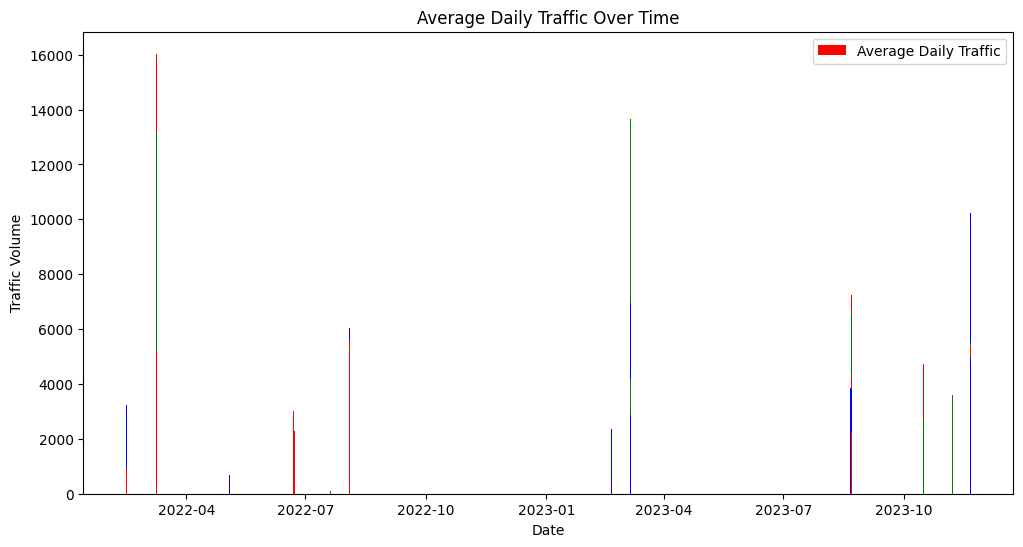

In [11]:
# Visualize the information (i.e. plot average daily traffic over time)
plt.figure(figsize=(12,6))
colors=['red', 'green', 'blue']
plt.bar(df['Start Date'], df['ADT'], color=colors, label='Average Daily Traffic')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Average Daily Traffic Over Time')
plt.legend()
plt.show()

In [12]:
# Create additional time based features (Feature Engineering)
df['Year'] = df['Start Date'].dt.year
df['Month'] =df['Start Date'].dt.month
df['Day']=df['Start Date'].dt.day
df['DayOfWeek']=df['Start Date'].dt.dayofweek
df.head()

,Start Date,End Date,ADT,AM Peak 8 To 9,PM Peak 5 To 6,Percent Heavy Vehicles,Speed Limit,Percentile 85th,Percent Exceed Speed Limit,Street Location,Direction Bound,Longitude,Latitude,Year,Month,Day,DayOfWeek
0,2022-03-09,2022-03-16,2775,257,245,12.2,50,40.32,1.038,Hampden Road,Northbound,115.813439,-31.972883,2022,3,9,2
1,2022-03-09,2022-03-16,2426,208,252,14.4,50,37.98,0.461,Hampden Road,Southbound,115.813439,-31.972883,2022,3,9,2
2,2022-03-09,2022-03-16,2775,257,245,12.2,50,40.32,1.038,Hampden Road,Northbound,115.813439,-31.972883,2022,3,9,2
3,2022-03-09,2022-03-16,2426,208,252,14.4,50,37.98,0.461,Hampden Road,Southbound,115.813439,-31.972883,2022,3,9,2
4,2023-02-20,2023-02-27,81,7,9,0.0,50,23.04,0.000,Altair Lane,Southbound/Northbound,115.813988,-31.972273,2023,2,20,0


In [13]:
# In a forecast model, we don't use X_train, y_train, X_test, y_test (which is applicable in a supervised ML model), we only use train data set and test dataset.
# The train dataset should include the supposed X_train and y_train as one datatset, while the test dataset should include the supposed X_test and y_test as one dataset
series= df[['Year', 'Month', 'Day', 'DayOfWeek', 'AM Peak 8 To 9', 'PM Peak 5 To 6', 'Percent Heavy Vehicles', 'Speed Limit', 'Percentile 85th', 'Percent Exceed Speed Limit', 'ADT','Street Location', 'Direction Bound', 'Longitude', 'Latitude']]
series.head()

,Year,Month,Day,DayOfWeek,AM Peak 8 To 9,PM Peak 5 To 6,Percent Heavy Vehicles,Speed Limit,Percentile 85th,Percent Exceed Speed Limit,ADT,Street Location,Direction Bound,Longitude,Latitude
0,2022,3,9,2,257,245,12.2,50,40.32,1.038,2775,Hampden Road,Northbound,115.813439,-31.972883
1,2022,3,9,2,208,252,14.4,50,37.98,0.461,2426,Hampden Road,Southbound,115.813439,-31.972883
2,2022,3,9,2,257,245,12.2,50,40.32,1.038,2775,Hampden Road,Northbound,115.813439,-31.972883
3,2022,3,9,2,208,252,14.4,50,37.98,0.461,2426,Hampden Road,Southbound,115.813439,-31.972883
4,2023,2,20,0,7,9,0.0,50,23.04,0.000,81,Altair Lane,Southbound/Northbound,115.813988,-31.972273


USING THE ARIMA MODEL TECHNIQUE TO BUILD A FORECAST MODEL

In [14]:
# The model to experiment with, will be the ARIMA model
# ARIMA uses p, d, q values
# p -> The number of lag observation included in the model (autoregressive part)
# d -> The number of times that the raw observations are differenced (integrated part)
# q -> The size of the moving average window (moving average part)

In [15]:
# d will be determined by plotting the data and checking for stationarity. If not stationary, the data will be differenced to make it stationary

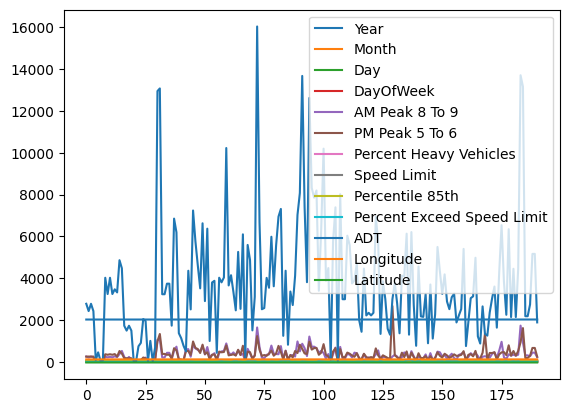

In [16]:
# Plotting the data
series.plot()
plt.show()

In [17]:
# Convert to a one-dimensional array(Arima is univirate) i.e. select one column out of the numerous columns, to analyze. Usually the output/result/dependent_value/y value, should be used, because it would be employed for the forecasting
series_id = series['ADT']

# Check for stationarity
result = adfuller(series_id)
print('ADF Statistic:', result)
print('p-value:', result)

ADF Statistic: (-9.870690686757465, 4.002354723408076e-17, 0, 190, {'1%': -3.4652439354133255, '5%': -2.8768752281673717, '10%': -2.574944653739612}, 3274.924080705672)
p-value: (-9.870690686757465, 4.002354723408076e-17, 0, 190, {'1%': -3.4652439354133255, '5%': -2.8768752281673717, '10%': -2.574944653739612}, 3274.924080705672)


ADF (AUGMENTED Dickey-Fuller) Test Results:


ADF Statistics: -9.870690686757465

p-value = 4.002354723408076e-17

Critical Values:

1%: -3.4652439354133255

5%: -2.8768752281673717

10%: -2.574944653739612

Since the ADF Statistics is much lower than the Critical Values and the p-value is less than 0.05, we reject the null hypothesis of the ADF test.
The null hypothesis test states that the series has a unit root(i.e., it is not stationary).
Rejecting the null hypothesis means the series/data does not have a unit root and is therefore stationary

In summary, since the null hypothesis (not-stationary) was rejected by the ADF Test Result, it means that series_id is stationary.

However, if the null hypothesis was accepted (ie, if the series_id or data is not-stationary), we difference with the code below to make it stationary:

series_diff = series_id.diff().dropna()

Finally (d) = 0 while building the ARIMA model, because the series_id was already stationary and no difffrencing was applied. If it wasn't stationary, the number of diffrencing applied using the 'series_diff' formular would have been applied, and d will be equal to the number of times the 'series_diff' was applied. For eg d=1 or 2 or 3, depending how many times 'series_diff' was applied.

NB: If not stationary, the stationarity check would need to be applied for each 'series_diff' check, to determine if the data has become stationary.

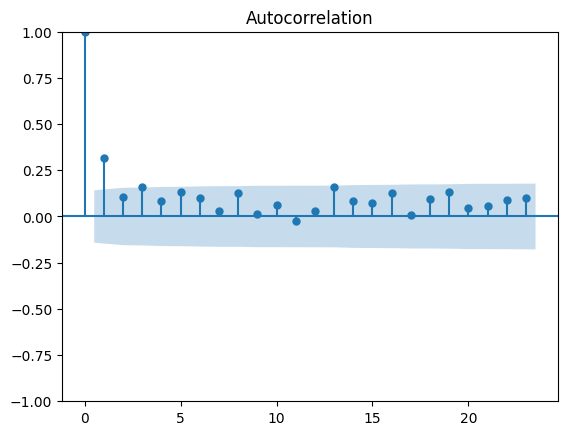

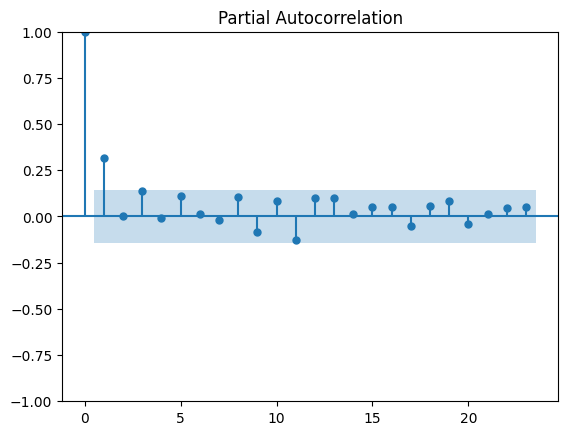

In [18]:
# Determine (p) and (q) using the PACF  and ACF  by ploting that
plot_acf(series_id)
plot_pacf(series_id)
plt.show()




1. Determining P from the PACF (Partial Autocorrelation function) plot:

PACF shows a large significant spike at lag 1.
After lag 1, the spikes seem to fall within the confidence interval (the shaded region), meaning they are statistically insignificant.
Thus, the P value can be set to 1, as the only significant partial autocorrelation occurs at lag 1.

2. Determining q from the ACF (Autocorrelation Function) plot:

In the ACF plot (from the first image), there is a significant spike at lag 1, and all other lags fall within the confidence interval (the shaded region/statistically insignificant).
Therefore, the q value should also be 1, based on the significant autocorrelation at lag 1 in the ACF plot.

IN CONCLUSION:

The values of the p,d,q arima models are:

P (from PACF) = 1 (since there's one significant spike at lag 1).

Q (from ACF) = 1 (since there's one significant spike at lag 1).

d (from differencing) =0 (since d is was stationary, i.e, no difference was applied)

Thus, the suggested model from these plots is ARIMA(1, 0, 1)



In [19]:
# Splitting the data into train and test
train_size = int(len(series_id)*0.8) # 80% of data for training
train, test = series_id[:train_size], series_id[train_size:] # train is all the dataset in the train_size, i.e the 80%. while the test is the data outside the train_size, i.e 20%

print('Training set size:', len(train))
print('Testing set size:', len(test))


Training set size: 152
Testing set size: 39


In [20]:
# Build the model using the already determined P, D, Q values
model = ARIMA(train, order=(1,0,1)) # ARIMA(p,d,q)
ARIMA_model = model.fit()

In [21]:
# Print model summary
print(ARIMA_model.summary())


                               SARIMAX Results                                
Dep. Variable:                    ADT   No. Observations:                  152
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1417.263
Date:                Fri, 25 Oct 2024   AIC                           2842.526
Time:                        12:18:38   BIC                           2854.622
Sample:                             0   HQIC                          2847.440
                                - 152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3843.0657    563.618      6.819      0.000    2738.394    4947.737
ar.L1          0.7374      0.124      5.969      0.000       0.495       0.979
ma.L1         -0.5088      0.147     -3.463      0.0

In [22]:
# Make predictions with the unseen test data
predictions = ARIMA_model.forecast(steps=len(test))

In [23]:
# Calculate performance metrics
mae = mean_absolute_error(test, predictions)     # mean absolute error
mse = mean_squared_error(test, predictions)      # mean squared error
rmse = mse**0.5                                  # root mean squared error
mape = (abs((test-predictions)/test).mean())*100 # mean absolute percentage error

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

MAE: 1911.685049401577
MSE: 7410456.3571960945
RMSE: 2722.2153399751633
MAPE: 77.94275658522047%


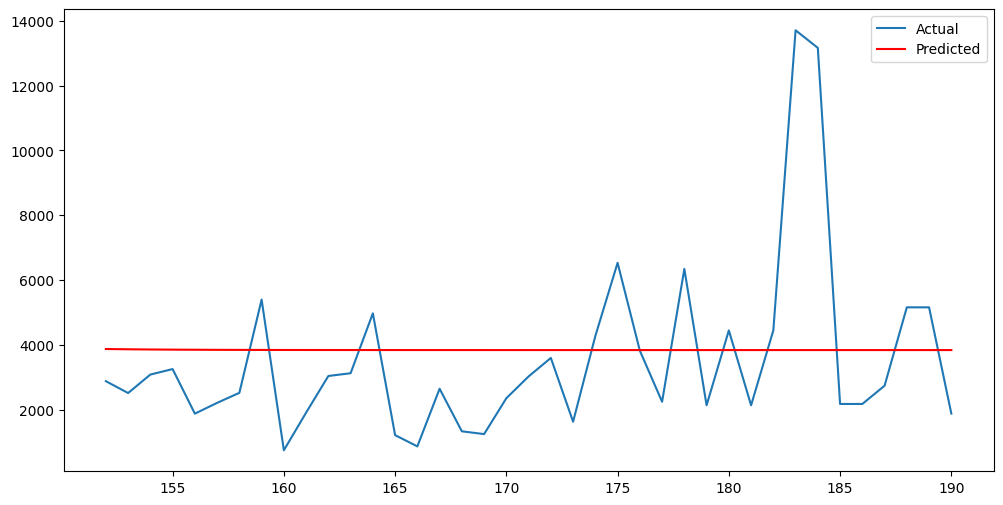

In [24]:
# Plot actual data against the predictions
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.legend()
plt.show()

In [25]:
# Checks that df still contains its original column
df.tail()

,Start Date,End Date,ADT,AM Peak 8 To 9,PM Peak 5 To 6,Percent Heavy Vehicles,Speed Limit,Percentile 85th,Percent Exceed Speed Limit,Street Location,Direction Bound,Longitude,Latitude,Year,Month,Day,DayOfWeek
186,2022-03-09,2022-03-16,2181,307,184,4.3,50,47.17,5.162,Hay Street,Northbound,115.879383,-31.961777,2022,3,9,2
187,2023-10-16,2023-10-23,2744,268,290,0.5,50,40.32,0.651,Royal street,Eastbound/Westbound,115.879520,-31.953141,2023,10,16,0
188,2022-03-09,2022-03-16,5161,438,663,1.6,50,46.98,4.727,Hay Street,Southbound,115.879956,-31.961537,2022,3,9,2
189,2022-03-09,2022-03-16,5161,438,663,1.6,50,46.98,4.727,Hay Street,Southbound,115.879956,-31.961537,2022,3,9,2
190,2023-10-16,2023-10-23,1885,220,247,2.4,50,46.98,7.600,Tragalgar Road,Southbound/Northbound,115.880141,-31.954494,2023,10,16,0


In [26]:
# Forecast traffic for the next 20 periods
forecast =ARIMA_model.forecast(steps=20) # Setting up the model to predict next 20 times
forecast_dates = pd.date_range(start=df['Start Date'].iloc[-1]+pd.Timedelta(days=1),periods=20, freq='D') #['Start Date'].iloc[-1], sets the starting date for the forecast, after the last date in 'Start Date' column of df
                                                                                                          # periods =20 means the prediction should be in range 20 dates
                                                                                                          # freq='D' set the frequency of the dates to daily




In [27]:
# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'Date': forecast_dates, 'forecast_ADT': forecast}) # 'forecast_ADT: forecast average daily traffic
forecast_df.set_index('Date', inplace=True)
forecast_df.head()


,forecast_ADT
Date,
2023-10-17,3875.972208
2023-10-18,3867.330023
2023-10-19,3860.957523
2023-10-20,3856.258623
2023-10-21,3852.793789


In [28]:
# Check the columns in forecast_df
forecast_df.columns

Index(['forecast_ADT'], dtype='object')

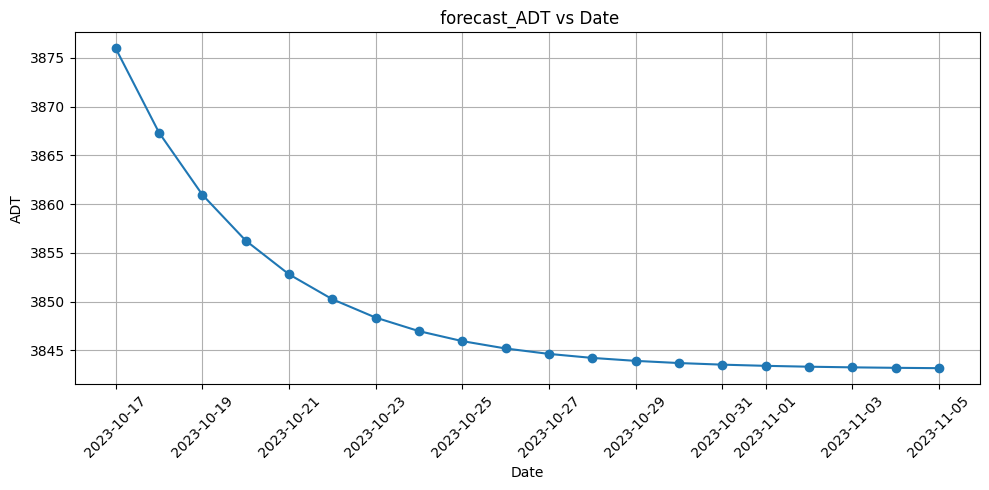

In [29]:
# Plot the ARIMA model (Univariate forecast)
plt.figure(figsize=(10, 5))
plt.plot(forecast_df.index, forecast_df['forecast_ADT'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('ADT')
plt.title(' forecast_ADT vs Date')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
# Conclusion:
# From the visualized traffic forecast result, there was more traffic on 10/17 2023. 
# Nb: This was a 2023 data, utilizing an updated year data like 2024 or 2025, will probably predict traffic information for future dates 
# Nb: Average traffic represent the total number of cars/vehicles passing a segment of a road in a day. So if the traffic is 3875, it means 3875 vehicles passing by that segment in a day.

USING THE SARIMA MODEL TECHNIQUE TO BUILD A FORECAST MODEL

In [31]:
# SARIMA model is another forecast model techniques, but it's different from the ARIMA, because it considers seasonality. It is a seasonality model while ARIMA is non-seasonal
# SARIMA model is built like this: SARIMAX(train_data, order=(p,d,q), seasonal_order=(p,d,q, seasonal_period)), while ARIMA model is built like this: ARIMA(train, order=(p,d,q))
# The seasonality_order in SARIMA represents the number of periods. For example if its an annual thing(one year), the seasonality_period = 12 (number of months in a year). If biennial, then its = 24(which is the case with the dataset above)
# The p,d,q, in SARIMA is determined same way as in ARIMA. 
# d is determined by differencing as explained above, which is = 0
# p is determined by plotting PACF, and observing the spike. The data we have for instance, has one spike, meaning there's just one re-occurance in 24 months(from PACF plot above). Ultimatelly, p = 1 for SARIMA model
# q is determined by plotting ACF. We also have 1 spike in q every 24 months (from the ACF plot above). So, technically, q = 1 for SARIMA model
# In summary, the seasonal_order for the SARIMA model: seasonal_order=(1,0,1, 24)

USING Multivariate SARIMA MODEL TECHNIQUE TO BUILD A FORECAST MODEL

In [32]:
# Multivariate SARIMA is an extension of the SARIMA (Seasonal Autoregressive Integrated Moving Average) model, which is used for forecasting time series data with both trend and seasonality
# While SARIMA models a single time series(univariate), multivariate SARIMA models multiple time series simultaneously, capturing the relationships between them
# In essence, it combines the concepts of autoregressive (AR), integrated (I), and moving average (MA) (i.e. p, d, q as explained in ARIMA) models with seasonal components, but it does this for multiple interrelated time series
# This makes it a powerful tool for forecasting when you have several related time series that influence each other

In [33]:
# Create a new dataframe from the original dataframe 
ef:pd.DataFrame = df.copy(deep=True)

# Ensure that dataframe has all the required features, including the ones created while working on the ARIMA model
ef.head()

,Start Date,End Date,ADT,AM Peak 8 To 9,PM Peak 5 To 6,Percent Heavy Vehicles,Speed Limit,Percentile 85th,Percent Exceed Speed Limit,Street Location,Direction Bound,Longitude,Latitude,Year,Month,Day,DayOfWeek
0,2022-03-09,2022-03-16,2775,257,245,12.2,50,40.32,1.038,Hampden Road,Northbound,115.813439,-31.972883,2022,3,9,2
1,2022-03-09,2022-03-16,2426,208,252,14.4,50,37.98,0.461,Hampden Road,Southbound,115.813439,-31.972883,2022,3,9,2
2,2022-03-09,2022-03-16,2775,257,245,12.2,50,40.32,1.038,Hampden Road,Northbound,115.813439,-31.972883,2022,3,9,2
3,2022-03-09,2022-03-16,2426,208,252,14.4,50,37.98,0.461,Hampden Road,Southbound,115.813439,-31.972883,2022,3,9,2
4,2023-02-20,2023-02-27,81,7,9,0.0,50,23.04,0.000,Altair Lane,Southbound/Northbound,115.813988,-31.972273,2023,2,20,0


In [34]:
# Check column names
print("Columns in DataFrame:", ef.columns.tolist())



Columns in DataFrame: ['Start Date', 'End Date', 'ADT', 'AM Peak 8 To 9', 'PM Peak 5 To 6', 'Percent Heavy Vehicles', 'Speed Limit', 'Percentile 85th', 'Percent Exceed Speed Limit', 'Street Location', 'Direction Bound', 'Longitude', 'Latitude', 'Year', 'Month', 'Day', 'DayOfWeek']


In [35]:
# Convert 'Start Date' to datetime
#if 'Start Date' in ef.columns:
    #ef['Start Date'] = pd.to_datetime(ef['Start Date'])
#else:
    #raise KeyError("Column 'Start Date' not found in DataFrame.")

In [36]:
# Set 'Start Date' as the index for the main DataFrame to facilitate time based operations
# Nb setting the date index is important for Sarima because it deals with seasonality
ef.set_index('Start Date', inplace=True)

# Check available columns again after setting the index
print("Columns after setting index:", ef.columns.tolist())

Columns after setting index: ['End Date', 'ADT', 'AM Peak 8 To 9', 'PM Peak 5 To 6', 'Percent Heavy Vehicles', 'Speed Limit', 'Percentile 85th', 'Percent Exceed Speed Limit', 'Street Location', 'Direction Bound', 'Longitude', 'Latitude', 'Year', 'Month', 'Day', 'DayOfWeek']


In [37]:
# Feature selection: The df will be split to columns_df and exog_df.
# columns_ef will be the original columns(with non-numerical columns removed) from our dataset while exog_df is the feature engineering columns, i.e. those extra columns created ('Year','Month','Day','DayOfWeek')
# Nb: exog is the short form of exogenous variables, meaning they were not initially part of the time series data. They are external factors created, that could potentially affect/influence the forecast
# The Multivariate Sarimax techniques considers building a relationship across multiple time series data simultaneously, including these external factors will help in modeling seasonality better
# They are been splitted so that the model can have a clear distinction between the main time series been forecasted and these external factors that can affect the forecast

In [38]:
# Feature selection: Only time-related and numerical data columns should be selected
required_columns = ['End Date','ADT', 'AM Peak 8 To 9', 'PM Peak 5 To 6', 
                    'Percent Heavy Vehicles', 'Speed Limit', 'Percentile 85th', 
                    'Percent Exceed Speed Limit', 'Longitude', 'Latitude']

# Check if all required columns exist before selection
missing_cols = [col for col in required_columns if col not in ef.columns]
if missing_cols:
    raise KeyError(f"Missing columns in DataFrame: {missing_cols}")

columns_ef = ef[required_columns]
exog_ef = ef[['Year', 'Month', 'Day', 'DayOfWeek']] 

In [39]:
# Splitting the two dataframes (columns_ef and exog_ef)data into train and test
train_size = int(len(ef)*0.8) # 80% of data for training
train, test = columns_ef[:train_size], columns_ef[train_size:] # train is all the dataset in the train_size, i.e the 80%. while the test is the data outside the train_size, i.e 20%
exog_train, exog_test = exog_ef[:train_size], exog_ef[train_size:]

print('Training set size:', len(train))
print('Testing set size:', len(test))

print('Training set size:', len(exog_train))
print('Testing set size:', len(exog_test))

Training set size: 152
Testing set size: 39
Training set size: 152
Testing set size: 39


In [40]:
# Define the SARIMAX model parameters
order = (1, 0, 1)  # ARIMA order (p, d, q)
seasonal_order = (1, 0, 1, 24) # seasonal_order = (p,d,q,seasonality). p, d, q value has already been determined from ARIMA 
                            # the seasonality is a 24 months season 

In [ ]:
# Build the SARIMAX model
model = SARIMAX(train['ADT'], order=order, seasonal_order=seasonal_order, exog=exog_train)
M_sarimax_model = model.fit(disp=False)

In [42]:
# Print model summary
print(M_sarimax_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                ADT   No. Observations:                  152
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 24)   Log Likelihood               -1405.748
Date:                            Fri, 25 Oct 2024   AIC                           2829.495
Time:                                    12:18:39   BIC                           2856.710
Sample:                                         0   HQIC                          2840.551
                                            - 152                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Year           2.1210      0.408      5.196      0.000       1.321       2.921
Month        141.0545    116.736   

In [ ]:
# Make predictions with the unseen test data
predictions = M_sarimax_model.forecast(steps=len(test), exog=exog_test)

In [44]:
# Calculate performance metrics
mae = mean_absolute_error(test['ADT'], predictions)     # mean absolute error
mse = mean_squared_error(test['ADT'], predictions)      # mean squared error
rmse = mse**0.5                                  # root mean squared error
#mape = (abs((test['ADT']-predictions)/test).mean())*100 # mean absolute percentage error

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
#print(f'MAPE: {mape}%')

MAE: 1855.5163311440895
MSE: 6660467.130056542
RMSE: 2580.788083135952


Visualize the Feature Engineering Data's (exogenous variables) against the Average daily traffic (ADT)

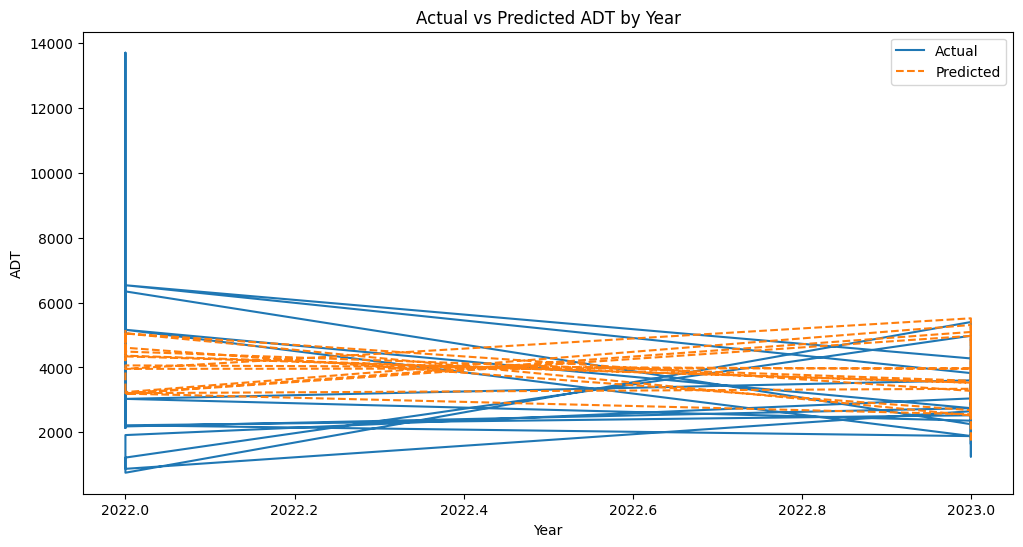

In [45]:
# Plot the Yearly against the ADT

# Extract year data from exog for the test set
test_year = exog_test['Year']

# Plot the actual ADT data against the predictions using the year data
plt.figure(figsize=(12, 6))
plt.plot(test_year, test['ADT'], label='Actual')
plt.plot(test_year, predictions, label='Predicted', linestyle='--')
plt.xlabel('Year')
plt.ylabel('ADT')
plt.title('Actual vs Predicted ADT by Year')
plt.legend()
plt.show()

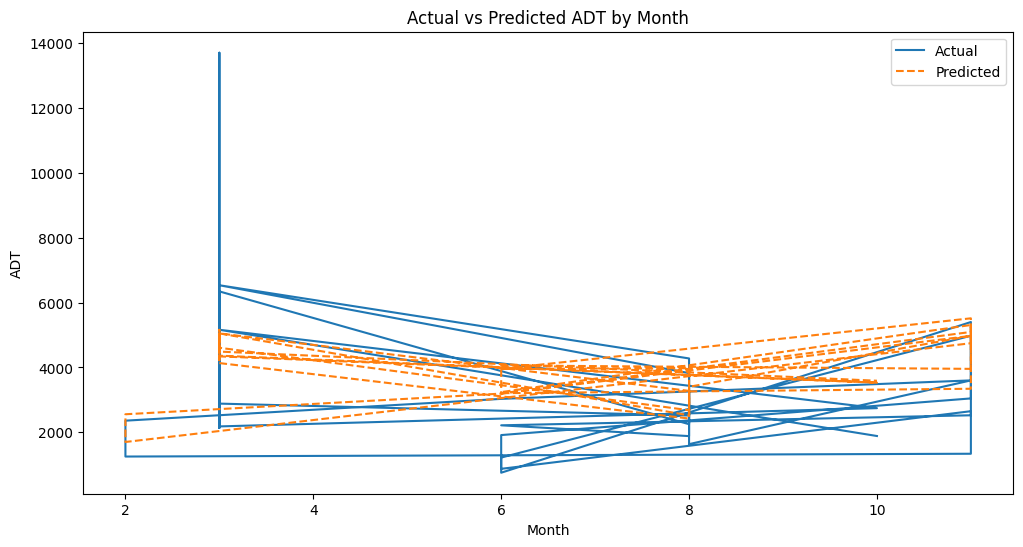

In [46]:
# Plot the Monthly against the ADT

# Extract month data from exog for the test set
test_months = exog_test['Month']

# Plot the actual ADT data against the predictions using the month data
plt.figure(figsize=(12, 6))
plt.plot(test_months, test['ADT'], label='Actual')
plt.plot(test_months, predictions, label='Predicted', linestyle='--')
plt.xlabel('Month')
plt.ylabel('ADT')
plt.title('Actual vs Predicted ADT by Month')
plt.legend()
plt.show()

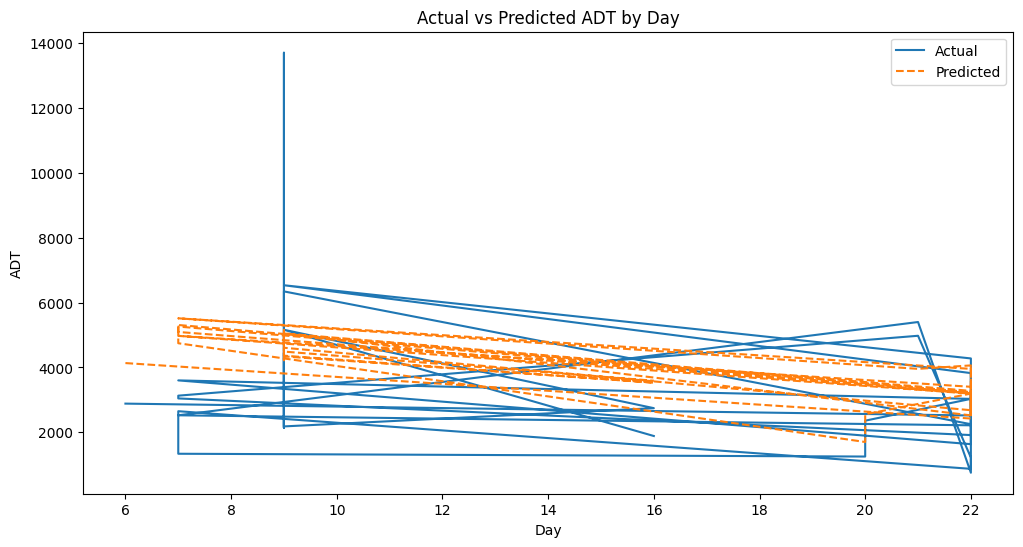

In [47]:
# Plot the Daily against the ADT

# Extract daily data from exog for the test set
test_day = exog_test['Day']

# Plot the actual ADT data against the predictions using the day data
plt.figure(figsize=(12, 6))
plt.plot(test_day, test['ADT'], label='Actual')
plt.plot(test_day, predictions, label='Predicted', linestyle='--')
plt.xlabel('Day')
plt.ylabel('ADT')
plt.title('Actual vs Predicted ADT by Day')
plt.legend()
plt.show()

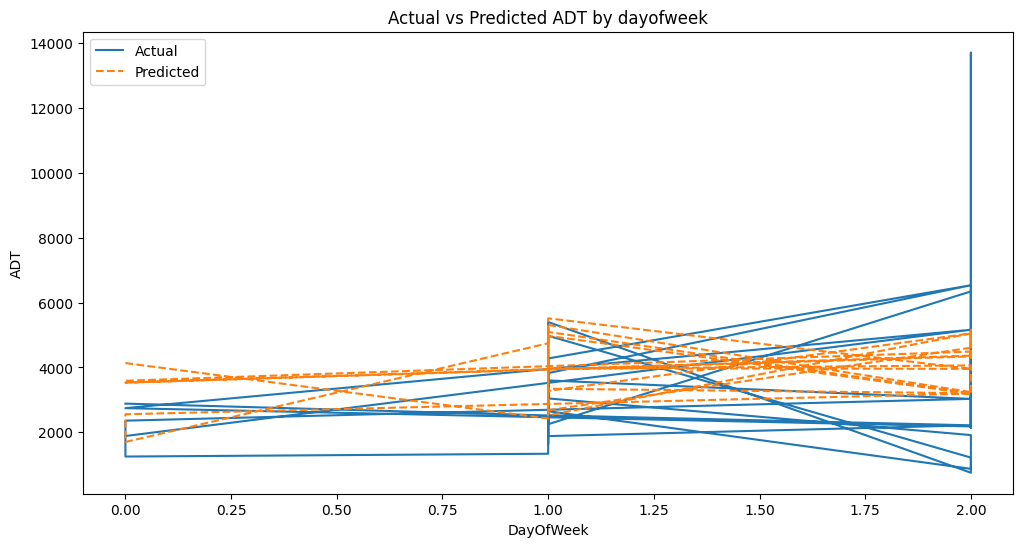

In [48]:
# Plot the dayofweek against the ADT

# Extract dayofweek data from exog for the test set
test_dayofweek = exog_test['DayOfWeek']

# Plot the actual ADT data against the predictions using the day data
plt.figure(figsize=(12, 6))
plt.plot(test_dayofweek, test['ADT'], label='Actual')
plt.plot(test_dayofweek, predictions, label='Predicted', linestyle='--')
plt.xlabel('DayOfWeek')
plt.ylabel('ADT')
plt.title('Actual vs Predicted ADT by dayofweek')
plt.legend()
plt.show()

In [ ]:
# Get the forecast period
forecast_steps = 10
forecast = M_sarimax_model.forecast(steps=forecast_steps, exog=exog_ef.iloc[-forecast_steps:]) # Get the last date in the exog dataframe


In [50]:
# Generate forecast dates
last_date = ef.index[-1]  # Get the last date in the original DataFrame
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'Date': forecast_dates, 'forecast_ADT': forecast})
# Set the date as index
forecast_df.set_index('Date', inplace=True)

In [51]:
# Display the forecast DataFrame
print("Forecast DataFrame:")
print(forecast_df.head())

Forecast DataFrame:
            forecast_ADT
Date                    
2023-10-17   4767.075425
2023-10-18   3883.313322
2023-10-19   4593.701540
2023-10-20   4022.128776
2023-10-21   5433.066975


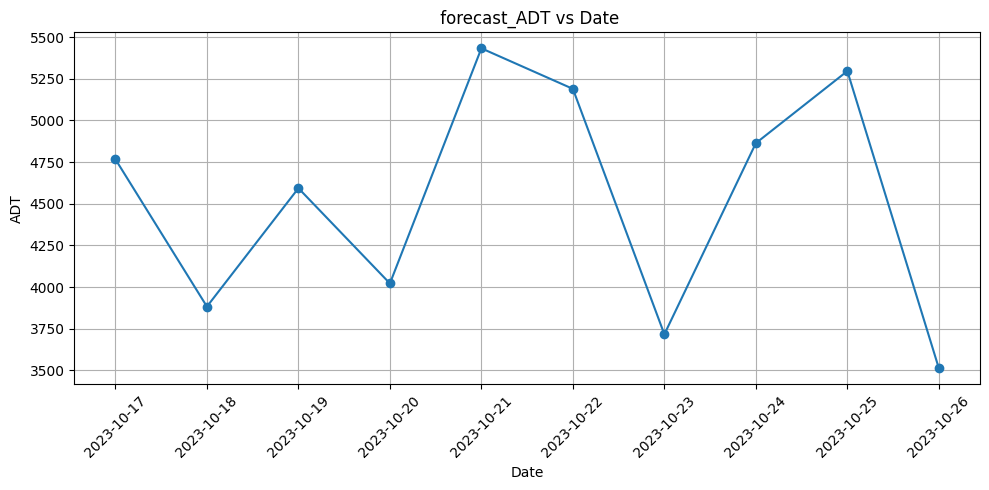

In [52]:
# Plot the Multivariate SARIMAX forecast
plt.figure(figsize=(10, 5))
plt.plot(forecast_df.index, forecast_df['forecast_ADT'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('ADT')
plt.title(' forecast_ADT vs Date')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Using LSTM (Long Short-Term Memory) technique, a recurrent neutral network (RNN), to build a Forecasting Model

In [53]:
# Set random seeds for reproducibility and to remove randomness in training initialization
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [54]:
# Create a new dataframe from the  original dataframe 
ff:pd.DataFrame = df.copy(deep=True)

# Ensure that dataframe has all the required features, including the ones created while working on the ARIMA model
ff.head()

,Start Date,End Date,ADT,AM Peak 8 To 9,PM Peak 5 To 6,Percent Heavy Vehicles,Speed Limit,Percentile 85th,Percent Exceed Speed Limit,Street Location,Direction Bound,Longitude,Latitude,Year,Month,Day,DayOfWeek
0,2022-03-09,2022-03-16,2775,257,245,12.2,50,40.32,1.038,Hampden Road,Northbound,115.813439,-31.972883,2022,3,9,2
1,2022-03-09,2022-03-16,2426,208,252,14.4,50,37.98,0.461,Hampden Road,Southbound,115.813439,-31.972883,2022,3,9,2
2,2022-03-09,2022-03-16,2775,257,245,12.2,50,40.32,1.038,Hampden Road,Northbound,115.813439,-31.972883,2022,3,9,2
3,2022-03-09,2022-03-16,2426,208,252,14.4,50,37.98,0.461,Hampden Road,Southbound,115.813439,-31.972883,2022,3,9,2
4,2023-02-20,2023-02-27,81,7,9,0.0,50,23.04,0.000,Altair Lane,Southbound/Northbound,115.813988,-31.972273,2023,2,20,0


In [ ]:
# Convert the date time to numeric because the model accept a string or numbers and not timestamp
ff[['Start Date', 'End Date']] = ff[['Start Date', 'End Date']].applymap(pd.Timestamp.toordinal)
ff[0:5]

In [56]:
# Feature selection for the independent variable
X = ff[['Start Date', 'End Date', 'AM Peak 8 To 9', 'PM Peak 5 To 6', 'Percent Heavy Vehicles', 'Speed Limit', 'Percentile 85th', 'Percent Exceed Speed Limit', 'Longitude', 'Latitude', 'Year', 'Month', 'Day', 'DayOfWeek']]
X[0:5]

,Start Date,End Date,AM Peak 8 To 9,PM Peak 5 To 6,Percent Heavy Vehicles,Speed Limit,Percentile 85th,Percent Exceed Speed Limit,Longitude,Latitude,Year,Month,Day,DayOfWeek
0,738223,738230,257,245,12.2,50,40.32,1.038,115.813439,-31.972883,2022,3,9,2
1,738223,738230,208,252,14.4,50,37.98,0.461,115.813439,-31.972883,2022,3,9,2
2,738223,738230,257,245,12.2,50,40.32,1.038,115.813439,-31.972883,2022,3,9,2
3,738223,738230,208,252,14.4,50,37.98,0.461,115.813439,-31.972883,2022,3,9,2
4,738571,738578,7,9,0.0,50,23.04,0.000,115.813988,-31.972273,2023,2,20,0


In [57]:
# Convert independent variable to numpy array
X = np.asarray(X)
X[0:5]

array([[ 7.38223000e+05,  7.38230000e+05,  2.57000000e+02,
         2.45000000e+02,  1.22000000e+01,  5.00000000e+01,
         4.03200000e+01,  1.03800000e+00,  1.15813439e+02,
        -3.19728830e+01,  2.02200000e+03,  3.00000000e+00,
         9.00000000e+00,  2.00000000e+00],
       [ 7.38223000e+05,  7.38230000e+05,  2.08000000e+02,
         2.52000000e+02,  1.44000000e+01,  5.00000000e+01,
         3.79800000e+01,  4.61000000e-01,  1.15813439e+02,
        -3.19728830e+01,  2.02200000e+03,  3.00000000e+00,
         9.00000000e+00,  2.00000000e+00],
       [ 7.38223000e+05,  7.38230000e+05,  2.57000000e+02,
         2.45000000e+02,  1.22000000e+01,  5.00000000e+01,
         4.03200000e+01,  1.03800000e+00,  1.15813439e+02,
        -3.19728830e+01,  2.02200000e+03,  3.00000000e+00,
         9.00000000e+00,  2.00000000e+00],
       [ 7.38223000e+05,  7.38230000e+05,  2.08000000e+02,
         2.52000000e+02,  1.44000000e+01,  5.00000000e+01,
         3.79800000e+01,  4.61000000e-01,  1.

In [58]:
#NB:
# Only the dependent variable is reshaped, in order to get it to the form that Machine learning models expect, which is a 2 dimensional(2D) form
# The 2D form should have both rows and columns
# Machine learning expects models to be in this form (n_samples, n_features), 
# The dependent variable (y) is in 1D format
# The independent variable(X) doesn't need to be reshaped as it is already in 2D form. I.e, it has rows and columns
# The reason for reshaping is to ensure that the target variable(y) is formatted in a way that is compatible with machine learning algorithms and frameworks and to reduces the likelihood of encountering issues during model training or evaluation.


# Feature selection and reshaping of the dependent variable using '.reshape'
y = ff[['ADT']].values.reshape(-1,1)

# Convert dependent variable to numpy array
y = np.asarray(y)
y[0:5]

array([[2775],
       [2426],
       [2775],
       [2426],
       [  81]], dtype=int64)

In [59]:
# Normalize the independent variable. Use MinMaxScale method, as it is the most commonly used for LSTM modeling especially for a time-series kind of data
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)
X[0:5]

array([[0.03565891, 0.02507837, 0.14756944, 0.09118199, 0.5       ,
        0.33333333, 0.44475693, 0.01188595, 0.        , 0.34305762,
        0.        , 0.11111111, 0.26315789, 0.66666667],
       [0.03565891, 0.02507837, 0.11921296, 0.09380863, 0.59016393,
        0.33333333, 0.3977501 , 0.00527883, 0.        , 0.34305762,
        0.        , 0.11111111, 0.26315789, 0.66666667],
       [0.03565891, 0.02507837, 0.14756944, 0.09118199, 0.5       ,
        0.33333333, 0.44475693, 0.01188595, 0.        , 0.34305762,
        0.        , 0.11111111, 0.26315789, 0.66666667],
       [0.03565891, 0.02507837, 0.11921296, 0.09380863, 0.59016393,
        0.33333333, 0.3977501 , 0.00527883, 0.        , 0.34305762,
        0.        , 0.11111111, 0.26315789, 0.66666667],
       [0.5751938 , 0.57053292, 0.00289352, 0.00262664, 0.        ,
        0.33333333, 0.09762957, 0.        , 0.00822761, 0.35681603,
        1.        , 0.        , 0.84210526, 0.        ]])

In [60]:
# Normalize the dependent variable
y = scaler.fit_transform(y)
y[0:5]

array([[0.17221147],
       [0.15042756],
       [0.17221147],
       [0.15042756],
       [0.00405717]])

In [61]:
# BUILDING THE LSTM MODEL

# Create sequence for LSTM. 
def create_sequences(data, time_step=1):
    X,y = [], []
    for i in range(len(data)-time_step):# This ensures you don’t go out of bounds in the data when accessing the time_step intervals
        X.append(data[i:(i+time_step), 0]) # Collect past 'time_step' values starting from first feature(0), and append to X
        y.append(data[i+time_step,0]) # Predict from the collected past 'time_step', and append it to y. Eg if data is: 0,1,2,3,4,5, collect 0,1 and store in X, then predict '2' based on information contained in the collected X (i.e., 0,1), and save prediction to y
                                      # time_step means how many step i.e, number of historical observation to use. Eg, if time_step is set to 5, it means the previous 4 historical information will be used to make prediction for the 5th
                                      # I.e, 0,1,2,3,4 will be used to predict the outcome of 5, based on 0 to 4 historical information, then append outcome to y, while 0 to 4 data will be appended to X
    
    return np.array(X), np.array(y) # return the result/list of X and y in numpy array form.

# Specify time step (look-back period)
time_step = 20  # Number of past time steps to consider. It can be adjusted 

# Create input features and target variable
X, y = create_sequences(y, time_step) # y is used to replace the data because it is the output or it contains the result/prediction. I.e, it contains the historical prediction, and that's where the model learns from to make futher predictions

In [62]:
# Reshape input to be in this form:[samples, time steps, features] ie 3D format
X = X.reshape(X.shape[0], X.shape[1], 1)  # We have one feature in the target data, which is 'ADT'

In [63]:
# Split the data into training and validation/testing
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, shuffle=False)# No Shuffling: Shuffle=False, so the model doesn't lose the temporal structure of the data, which is crucial for time series forecasting because future values depend on past values.
print('Train set:', X_train.shape, y_train.shape) #(row, column)
print('Validation set:', X_val.shape, y_val.shape)

Train set: (136, 20, 1) (136,)
Validation set: (35, 20, 1) (35,)


The Train set (144, 10, 1) are the X_train.shape values representing number of samples(n_samples), time_step( already set above) and number of features(n_features)

I.e, X_train.shape[0] = 144,     X_train.shape[1] = 10,       X_train.shape[2] = 1

In [ ]:
# Build the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer

In [65]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [66]:
# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Train the model with more epochs
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0332 - val_loss: 0.0315
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0313 - val_loss: 0.0314
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0322 - val_loss: 0.0314
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0310 - val_loss: 0.0316
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0317 - val_loss: 0.0314
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0331 - val_loss: 0.0313
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0317 - val_loss: 0.0314
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0324 - val_loss: 0.0314
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0319 - val_loss: 0.0313
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0318 - val_loss: 0.0314
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0319 - val_loss: 0.0317
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0304 - val_loss: 0

In [67]:
# Make predictions
y_pred = model.predict(X_val)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


In [68]:
# In most machine learning (ML) processes, if you're not transforming or scaling your data, you can directly calculate metrics like RMSE (Root Mean Squared Error) without needing to perform any inverse transformation. 
# However, when working with scaled or normalized data (as is often the case with models like LSTM), an inverse transformation is necessary for interpreting the results in the original scale of the data.

In [69]:
# Inverse transform predictions and actual values for RMSE calculation
y_pred_inv = scaler.inverse_transform(y_pred)
y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1))

In [70]:
# For timeseries forecast, the performance is usually measured/determined by the following method

#RMSE (Root Mean Squared Error): Measures the average magnitude of error.
#MAE (Mean Absolute Error): Measures the average absolute difference between predictions and actual values.
#R-squared (Coefficient of Determination): Measures how well the model's predictions match the true data. It ranges from 0 to 1, where a score of 1 means perfect predictions.
#MAPE (Mean Absolute Percentage Error): Measures the percentage error.

In [71]:
# Calculate RMSE 
rmse = np.sqrt(np.mean((y_val_inv - y_pred_inv) ** 2))
mae = mean_absolute_error(y_val_inv, y_pred_inv)
r2 = r2_score(y_val_inv, y_pred_inv)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print (f'r2: {r2:.2f}')

RMSE: 2842.42
MAE: 1935.83
r2: 0.00


In [73]:
# Forecast for 20 days with LSTM model

forecast_days = 20
current_input = X_train[-1].reshape(1, -1, 1)  # Reshape for LSTM, where 1, -1, 1, are [no_of samples, timestep(as explained before), no_of features]
                                               # the no of samples has been set to 1, because the next value is predicted based onone sequence
                                               # timestamp allows LSTM to know how many steps it can look back to, based on input data
                                               # there's only one feature/dependent value in the dataset , which is the 'ADT'
predictions = []

for _ in range(forecast_days):
    predicted_value = model.predict(current_input)
    predictions.append(predicted_value[0, 0])
    current_input = np.append(current_input[:, 1:, :], predicted_value.reshape(1, 1, 1), axis=1) # for 'current_input[:,1:,:]': (:)means select all samples, 
                                                                                                 # (1:)means select timestamp starting from 2nd(ie drop the first timestamp) this helps in maintainin consistent sequence lengths for 
                                                                                                 # (:) means select all features (i.e all values in 'ADT' column)
                                                                                                 # for 'predicted_value.reshape(1, 1, 1)': this is basically to update the predicted value/add them as new prediction to current_input
                                                                                     # In summary: The purpose of this line is to Update the current_input array by removing the oldest time step (the first one) and adding the newly predicted value as the latest time step

# Convert predictions back to a numpy array
predictions = np.array(predictions) 

# Print the predicted values for the next 20 days
print("Predicted values for the next 20 days:")
print(predictions.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted values for the next 20 days:
[0.20482987 0.19535848 0.20124117 0.19092032 0.1918183  0.19969162
 0.19554028 0.19922543 0.20329571 0.20409772 0.21211004 0.21210873
 0.21924776 0.2233141  0.21823919 0.21512944 0.21470246 0.21128988


In [91]:
# CREATE A NEW DATAFRAME TO FOR THE FORECASTING

# Ensure 'Start Date' is in datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'])

# Creating a DataFrame for the forecast
last_date = df['Start Date'].iloc[-1]  # Get the last date from the 'Start Date' column

# Generate future dates
forecast_days = 20  # Adjust as necessary
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_days)

# Check predictions shape
print("Shape of predictions before flattening:", predictions.shape)

# Ensure predictions is 1-dimensional
predictions = predictions.flatten()  # Flatten to ensure it's 1D


# Ensure both arrays are 1D
assert future_dates.shape[0] == len(predictions), "Length of future_dates and predictions must match"

# Create a DataFrame
forecast_df = pd.DataFrame({
    'date': future_dates,
    'forecast ADT': scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()  # Inverse transform to original scale, then flatten
})

print(forecast_df)

Shape of predictions before flattening: (20,)
         date  forecast ADT
0  2023-10-17   3297.579346
1  2023-10-18   3145.838379
2  2023-10-19   3240.084717
3  2023-10-20   3074.734619
4  2023-10-21   3089.120850
5  2023-10-22   3215.259521
6  2023-10-23   3148.750732
7  2023-10-24   3207.790527
8  2023-10-25   3273.000488
9  2023-10-26   3285.849609
10 2023-10-27   3414.215088
11 2023-10-28   3414.194092
12 2023-10-29   3528.568359
13 2023-10-30   3593.715332
14 2023-10-31   3512.410156
15 2023-11-01   3462.588623
16 2023-11-02   3455.748047
17 2023-11-03   3401.075195
18 2023-11-04   3409.056396
19 2023-11-05   3440.741455


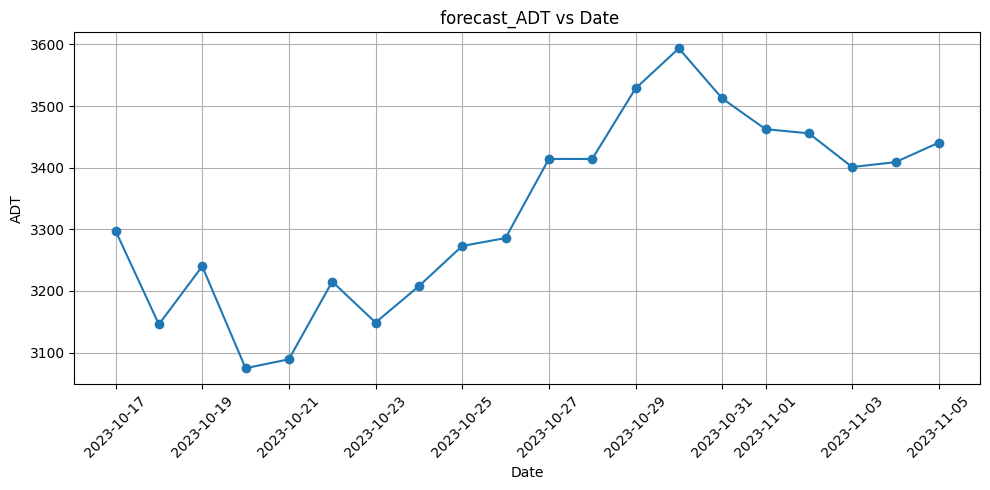

In [92]:
# Plot the LSTM forecast
plt.figure(figsize=(10, 5))
plt.plot(forecast_df['date'], forecast_df['forecast ADT'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('ADT')
plt.title(' forecast_ADT vs Date')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()